In [30]:
import pandas as pd
import datetime
import quandl
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
%matplotlib inline

In [31]:
data = pd.read_csv('index.csv', header=None)
data.head()

,0,1,2
0,Induction of High-level Behaviors from Problem...,April 2009,"Vivien Robinet, Gilles Bisson, Mirta B. Gordon..."
1,Introduction to Machine Learning: Class Notes ...,April 2009,Amnon Shashua
2,Considerations upon the Machine Learning Techn...,April 2009,"Alin Munteanu, Cristina Ofelia Sofran"
3,Data Mining and Machine Learning in Astronomy,June 2009,"Nicholas M. Ball, Robert J. Brunner"
4,Restart Strategy Selection using Machine Learn...,July 2009,"Shai Haim, Toby Walsh"


In [32]:
data.columns = ['Title', 'Date', 'Authors']
data = data.set_index('Date')

In [33]:
data.head()

,Title,Authors
Date,,
April 2009,Induction of High-level Behaviors from Problem...,"Vivien Robinet, Gilles Bisson, Mirta B. Gordon..."
April 2009,Introduction to Machine Learning: Class Notes ...,Amnon Shashua
April 2009,Considerations upon the Machine Learning Techn...,"Alin Munteanu, Cristina Ofelia Sofran"
June 2009,Data Mining and Machine Learning in Astronomy,"Nicholas M. Ball, Robert J. Brunner"
July 2009,Restart Strategy Selection using Machine Learn...,"Shai Haim, Toby Walsh"


In [13]:
all_authors = data['Authors']
for i in range(len(all_authors)):
    all_authors[i] = all_authors[i].split(',')
author_index = {}
for index in range(len(all_authors)):
    if index not in author_index:
        author_index[all_authors[index]] = index

In [28]:
all_authors.values.reshape(-1)

array([list(['Vivien Robinet', ' Gilles Bisson', ' Mirta B. Gordon', ' Benoît Lemaire']),
       list(['Amnon Shashua']),
       list(['Alin Munteanu', ' Cristina Ofelia Sofran']), ...,
       list(['Maksym Tsizh', ' Bohdan Novosyadlyj', ' Yurij Holovatch', ' Noam I Libeskind']),
       list(['Yue Zhao', ' Xuejian Wang', ' Cheng Cheng', ' Xueying Ding']),
       list(['Yingtian Chen', ' Bo-Qiang Ma'])], dtype=object)

In [34]:
all_authors

Date
April 2009       [Vivien Robinet,  Gilles Bisson,  Mirta B. Gor...
April 2009                                         [Amnon Shashua]
April 2009                [Alin Munteanu,  Cristina Ofelia Sofran]
June 2009                   [Nicholas M. Ball,  Robert J. Brunner]
July 2009                                 [Shai Haim,  Toby Walsh]
August 2009      [Manda Banerji,  Ofer Lahav,  Chris J. Lintott...
October 2009              [Alexander Hentschel,  Barry C. Sanders]
October 2009                    [Evan Hurwitz,  Tshilidzi Marwala]
November 2009                                    [Emanuel Diamant]
November 2009                                       [Marco Cuturi]
January 2010                                   [Francesco Dinuzzo]
March 2010                              [Vidhya. K. A,  G. Aghila]
April 2010                                  [Nikolai Gagunashvili]
May 2010           [Adam Gauci,  Kristian Zarb Adami,  John Abela]
May 2010                   [Lars Kotthoff,  Ian Gent,  Ia

In [38]:
from sklearn.preprocessing import OneHotEncoder

all_authors = data['Authors']
all_authors
authors_expanded = all_authors.str.split(', ', expand=True)

authors_expanded

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
Date,,,,,,,,,,,,,,,,,,,,,
April 2009,Vivien Robinet,Gilles Bisson,Mirta B. Gordon,Benoît Lemaire,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
April 2009,Amnon Shashua,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
April 2009,Alin Munteanu,Cristina Ofelia Sofran,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
June 2009,Nicholas M. Ball,Robert J. Brunner,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
July 2009,Shai Haim,Toby Walsh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
August 2009,Manda Banerji,Ofer Lahav,Chris J. Lintott,Filipe B. Abdalla,Kevin Schawinski,Steven P. Bamford,Dan Andreescu,Phil Murray,M. Jordan Raddick,Anze Slosar,...,None,None,None,None,None,None,None,None,None,None
October 2009,Alexander Hentschel,Barry C. Sanders,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
October 2009,Evan Hurwitz,Tshilidzi Marwala,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
November 2009,Emanuel Diamant,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [51]:
authors_stacked = authors_expanded.stack()
oh_enc = OneHotEncoder()
authors_oh = oh_enc.fit_transform(authors_stacked.values.reshape(-1, 1)).toarray()

authors_df = pd.DataFrame(authors_oh, index=authors_stacked.index)
authors_df.head()

0      1      2      3      4      5      6      7      8      \
Date                                                                          
April 2009 0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

              9      ...    11165  11166  11167  11168  11169  11170  11171  \
Date                 ...                                                      
April 2009 0    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           1    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           2    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           3    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
           0    0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   

              11172  11173  11174  
Date                               
April 2009 0    0.0    0.0    0.0  
           1    0.0    0.0    0.0  
           2    0.0    0.0    0.0  
           3    0.0    0.0    0.0  
           0    0.0    0.0    0.0  

[5 rows x 11175 columns]

In [58]:
dt_index = pd.to_datetime(authors_stacked.index.get_level_values(level=0))

dt_index

DatetimeIndex(['2009-04-01', '2009-04-01', '2009-04-01', '2009-04-01',
               '2009-04-01', '2009-04-01', '2009-04-01', '2009-06-01',
               '2009-06-01', '2009-07-01',
               ...
               '2019-10-01', '2019-10-01', '2019-10-01', '2019-10-01',
               '2019-10-01', '2019-10-01', '2019-10-01', '2019-10-01',
               '2019-10-01', '2019-10-01'],
              dtype='datetime64[ns]', name='Date', length=13400, freq=None)

In [65]:
authors_df.index = dt_index
authors_count = authors_df.groupby('Date').sum().sort_index()

In [224]:
authors_count_sum = authors_count.sum()
authors_count = authors_count['2015-07-01':]

# Amazon Stock Prices

In [248]:
# authors_count.index.strftime('%Y-%m-%d').tolist()

In [257]:
quandl.ApiConfig.api_key = 'bi3pg-ZaWdjcgACuBAz4'
amazon_eod = pd.DataFrame(quandl.get('EOD/AMZN').loc[:, 'Adj_Close'], columns=['Adj_Close'])
cleaned_amazon_eod = amazon_eod['2015-07':].resample('B').interpolate(method='cubic')
cleaned_amazon_eod = cleaned_amazon_eod.loc[authors_count.index]

/Users/limyiheng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [268]:
cleaned_amazon_eod = cleaned_amazon_eod.dropna()

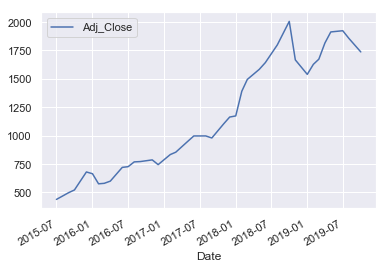

In [269]:
cleaned_amazon_eod.plot(y='Adj_Close')

In [270]:
cleaned_amazon_eod_copy = cleaned_amazon_eod.copy()
y_target = cleaned_amazon_eod_copy['Adj_Close'].shift(-3)
new_cleaned_amazon_eod = pd.concat([cleaned_amazon_eod_copy, y_target], axis = 1)
new_cleaned_amazon_eod = new_cleaned_amazon_eod.set_axis([*new_cleaned_amazon_eod.columns[:-1], 'Target_close'], axis=1, inplace=False)
new_cleaned_amazon_eod.head()

,Adj_Close,Target_close
Date,,
2015-07-01,437.390000,679.060000
2015-09-01,496.540000,663.609215
2015-10-01,520.720000,574.810000
2015-12-01,679.060000,579.040000
2016-01-01,663.609215,598.500000


In [279]:
available_dates = authors_count.index[authors_count.index.isin(new_cleaned_amazon_eod.index)]

In [295]:
new_authors_count = authors_count.loc[available_dates]
new_authors_count = new_authors_count[:-3]
new_authors_count.tail()

,0,1,2,3,4,5,6,7,8,9,...,11165,11166,11167,11168,11169,11170,11171,11172,11173,11174
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
new_cleaned_amazon_eod = new_cleaned_amazon_eod.loc[available_dates]
new_cleaned_amazon_eod = new_cleaned_amazon_eod.dropna()
new_cleaned_amazon_eod['Output'] = np.where(new_cleaned_amazon_eod['Adj_Close'] > new_cleaned_amazon_eod['Target_close'], 0, 1)
new_cleaned_amazon_eod.tail()

/Users/limyiheng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


,Adj_Close,Target_close,Output
Date,,,
2019-01-01,1538.013303,1814.19,1
2019-02-01,1626.230000,1911.52,1
2019-03-01,1671.730000,1922.19,1
2019-04-01,1814.190000,1855.32,1
2019-05-01,1911.520000,1735.65,0


In [315]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_authors_count.values, new_cleaned_amazon_eod['Output'].values, test_size=0.2)


In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.arange(100, 2000, 10)]
max_feature = ['sqrt']
max_depth = [int(x) for x in range(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [ False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_feature,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}

rf_clf = RandomForestClassifier()

rf_cv_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=random_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [317]:
rf_cv_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.9min finished
/Users/limyiheng/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'bootstrap': [False], 'min_samples_split': [2, 5, 10], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, ..., 1940, 1950, 1960, 1970, 1980, 1990], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]},
          pre_dis

In [318]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = rf_cv_search.best_estimator_.predict(X_test)

In [319]:
accuracy_score(y_test, y_pred)

0.7142857142857143

In [320]:
confusion_matrix(y_test, y_pred)

array([[0, 2],
       [0, 5]])